In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
log = pd.read_csv('stimlog.txt', sep='\t', names=['Time', 'Level', 'Msg'])
log

,Time,Level,Msg
0,7.4198,WARNING,Monitor specification not found. Creating a te...
1,7.4588,WARNING,User requested fullscreen with size [1024 768...
2,10.3008,WARNING,Couldn't measure a consistent frame rate.
3,- Is your graphics card set to sync to verti...,NaN,NaN
4,- Are you running other processes on your co...,NaN,NaN
...,...,...,...
1573,51.5719,EXP,middleCard: autoDraw = True
1574,51.6004,EXP,leftCard: autoDraw = False
1575,51.6156,EXP,rightCard: autoDraw = False
1576,51.6666,EXP,leftCard: autoDraw = True


In [17]:
exp = log[log.Level == 'EXP ']
left = exp[exp.Msg.str.contains('leftCard: ')].Time.value.astype(float)s
middle = exp[exp.Msg.str.contains('middleCard: ')].Time.values
right = exp[exp.Msg.str.contains('rightCard: ')].Time.values
left[:5]

SyntaxError: invalid syntax (<ipython-input-17-ae6ef0690350>, line 2)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

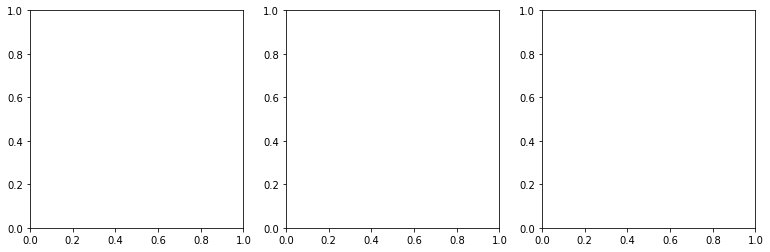

In [11]:
fig, axes = plt.subplots(figsize=(13, 4), ncols=3) 
axes[0].hist(0.5 / np.diff(left), rwidth=0.3) 
axes[0].set(     
    title=f"{len(left)} Events @ {np.median(0.5 / np.diff(left)):.2f} Hz",     
    xlabel="Instantaneous Blink Frequency (Hz)", )  
axes[1].hist(0.5 / np.diff(middle), rwidth=0.3) 
axes[1].set(     
    title=f"{len(middle)} Events @ {np.median(0.5 / np.diff(middle)):.2f} Hz",     
    xlabel="Instantaneous Blink Frequency (Hz)", )
axes[2].hist(0.5 / np.diff(right), rwidth=0.3); 
axes[2].set(     
    title=f"{len(right)} Events @ {np.median(0.5 / np.diff(right)):.2f} Hz",     
    xlabel="Instantaneous Blink Frequency (Hz)", )
